<a href="https://colab.research.google.com/github/jssart99/M-S-2020-2/blob/master/REGLA_DEL_TRAPECIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REGLA DEL TRAPECIO**

La regla del trapecio es un método de integración, se basa en aproximar el valor de la integral de $f(x)$ por el de la función lineal, que pasa a través de los puntos ***a*** ----> $f(a)$ y ***b*** ----> $f(b)$. La integral de ésta es aproximadamente igual al área del trapecio bajo la gráfica de la función lineal.


**REGLA DEL TRAPECIO SIMPLE**

Se hace con un sólo trapecio entre a y b

$\int_{a}^{b} f(x) \, dx \simeq (b-a)\frac{f(a)+f(b)}{2}$

**REGLA DEL TRAPECIO COMPUESTA**

Se hace la aproximación utilizando n trapecios. En la formulación de este método se supone que f es continua y positiva en el intervalo $[a,b]$. De tal modo la integral definida

$\int_{a}^{b} f(x) \, dx$

representa el área de la región delimitada por la gráfica de $f$ y el eje $x$, desde $x=a$ hasta $x=b$. Primero se divide el intervalo $[a,b]$ en n subintervalos, cada uno de ancho 

$\Delta x\, = (b-a)/n$

$\int_{a}^{b} f(x) \, dx \simeq \frac{(b-a)}{n}[\frac{f(a)+f(b)}{2}+\sum_{k=1}^{n-1}f(a+k\frac{b-a}{n})]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def f(x):
  y=x**3
  return y

def AT(a,b,n):
  k=1
  h=(b-a)/n
  I1=h*((f(a)+f(b))/2)
  I2=0
  while k <=n-1:
    x=a+k*h
    y=f(x)
    I2+=h*y
    k+=1
  I=I1+I2
  return I

0.26000000000000006


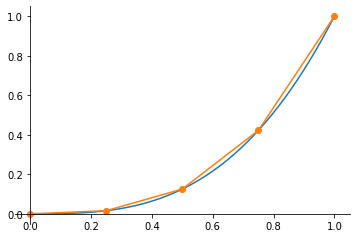

In [3]:
a=0
b=1
n=5
j=AT(a,b,n)
x=np.linspace(a,b)
x1=np.linspace(a,b,n)
y=f(x)
y1=f(x1)
print(j)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,y)
plt.plot(x1,y1,'-o')

**Regla Trapezoidal (Ecuaciones Diferenciales)**

La regla trapezoidal es un método numérico de resolución de ecuaciones diferenciales ordinarias derivado de la regla del trapecio para calcular integrales. Es un método implícito de segundo orden.

$y'=f(t,y)$

$y_{n+1}=y_n+\frac{h}{2}(f(t_n,y_n)+f(t_{n+1},y_{n+1}))$

$h=\Delta{t}=t_{n+1}-t_n$

Este es un método implícito: el valor $y_{n+1}$ aparece en ambos lados de la ecuación, y para calcularlo realmente, hay que resolver una ecuación que será generalmente no lineal. Un método posible para resolver esta ecuación es el método de Newton.

$y_{n+1}=y_n-\frac{f(x_n)}{f'(x_n)}$

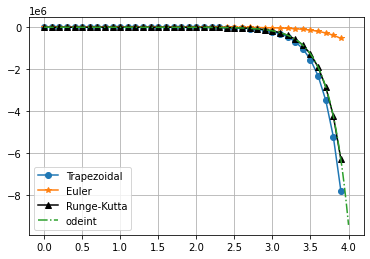

In [23]:
def g(x,t):
  g = 4*x-t
  return g

def MNR(g,x0,h,ts,t0,tol,itermax):
  E = 1
  x = x0
  Xant = x0
  t = t0
  i = 0
  F = lambda Xv: Xv - Xant - (h/2)*(g(Xant,t)+g(Xv,ts))
  while E > tol and i < itermax:
    xs = x - F(x)/((F(x+0.000001)-F(x))/(0.000001))
    E=np.abs((xs - x)/(xs))
    i += 1
    x = xs
  return x

def MEE(g,h,tspan,x0):
  X = []
  X.append(x0)
  for n in range(0,len(tspan)-1):
    xs=X[n] + h*g(X[n],tspan[n])
    X.append(xs)

  return tspan, X

def MRK4(g,h,tspan,x0):
  X=[]
  X.append(x0)
  for n in range(0,len(tspan)-1):
    k1 = g(X[n],tspan[n])
    k2 = g(X[n] + (k1*h/2),tspan[n] + h/2)
    k3 = g(X[n] + (k2*h/2),tspan[n] + h/2)
    k4 = g(X[n] + k3*h,tspan[n] + h)
    xs = X[n] + (h/6)*(k1 + 2*k2 + 2*k3 +k4)
    X.append(xs)

  return tspan, X

def MTE(g,h,tspan,x0):
  X = []
  X.append(x0)
  for n in range(0,len(tspan)-1):
    xs=MNR(g,X[n],h,tspan[n+1],tspan[n],1e-7,1000)
    X.append(xs)
  return tspan, X

def main():
  h=0.1
  tspan = np.arange(0,4,h)
  tspanR = np.arange(0,4,0.0001)
  x0 = -1

  tspan1, X1 = MTE(g,h,tspan,x0)
  tspan2, X2 = MEE(g,h,tspan,x0)
  tspan3, X3 = MRK4(g,h,tspan,x0)

  y = odeint(g,x0,tspanR)

  plt.plot(tspan1,X1,'-o',label='Trapezoidal')
  plt.plot(tspan2,X2,'-*',label='Euler')
  plt.plot(tspan3,X3,'-^k',label='Runge-Kutta')
  plt.plot(tspanR,y,'-.',label='odeint')
  plt.legend()
  plt.grid()
  plt.show()

main()
